In [49]:
import pandas as pd
import seaborn as sns
from math import pi

In [50]:
ipl_match = pd.read_csv('C://Datascience Projects/Python/input/ipl_match.csv')
ipl_match_copy= ipl_match.copy()

In [51]:
ipl_match_copy.head(3)

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders
0,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN
1,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN
2,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,5,5,wides,NaN,NaN,NaN


#### Before moving forward, let’s categorize each delivery into match phases: Powerplay, Middle Overs, and Death Overs; based on the over number

In [52]:
# add game phase based on overs

In [53]:
def get_phase(over):
    if over < 6:
        return 'Powerplay'
    elif 6 <= over < 15:
        return 'Middle Overs'
    else:
        return 'Death Overs'

ipl_match_copy['phase'] = ipl_match_copy['over'].apply(get_phase)

In [54]:
ipl_match_copy.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders,phase
0,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay
1,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay
2,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,5,5,wides,NaN,NaN,NaN,Powerplay
3,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,1,0,1,NaN,NaN,NaN,NaN,Powerplay
4,Royal Challengers Bengaluru,0,V Kohli,MA Starc,PD Salt,1,0,1,NaN,NaN,NaN,NaN,Powerplay


### Now, let’s calculate each batter’s strike rate across different phases of the game and visualize their batting intent

In [55]:
import plotly.express as px
import pandas as pd

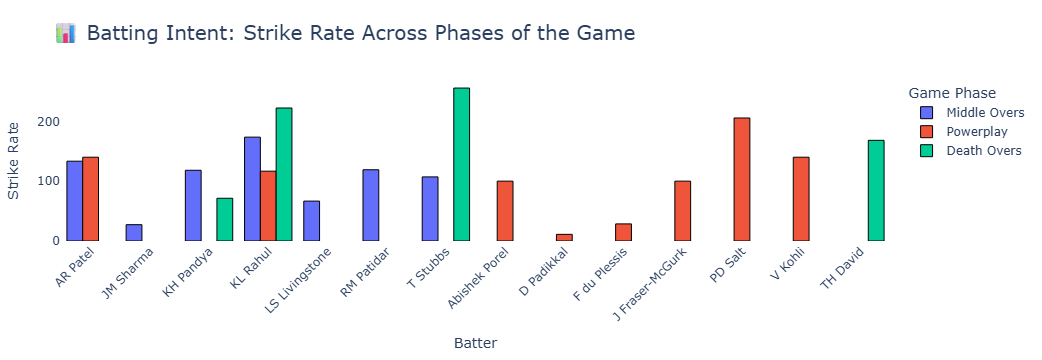

In [56]:
batting_intent = (
    ipl_match_copy.groupby(['batter', 'phase'])
    .agg(balls_faced=('runs_batter', 'count'),
         total_runs=('runs_batter', 'sum'))
    .reset_index()
)
batting_intent['strike_rate'] = (batting_intent['total_runs'] / batting_intent['balls_faced']) * 100

batting_intent = batting_intent[batting_intent['balls_faced'] >= 5]

batting_intent.sort_values(by=['batter', 'phase'], inplace=True)

fig = px.bar(
    batting_intent,
    x='batter',
    y='strike_rate',
    color='phase',
    barmode='group',
    title='📊 Batting Intent: Strike Rate Across Phases of the Game',
    labels={'strike_rate': 'Strike Rate', 'batter': 'Batter'},
    hover_data={
        'balls_faced': True,
        'total_runs': True,
        'strike_rate': ':.2f',
        'phase': True
    }
)

fig.update_layout(
    xaxis_tickangle=-45,
    title_font_size=20,
    legend_title='Game Phase',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='white',
    bargap=0.2,
    margin=dict(l=40, r=40, t=80, b=100)
)

fig.update_traces(marker_line_width=1, marker_line_color='black')

fig.show()

#### Team-Wise Batting Intent Across Match Phases

In [57]:
ipl_match_copy['batting_team'] = ipl_match_copy['team']
team_phase_intent = (

    ipl_match_copy.groupby(['batting_team', 'phase'])
    .agg(balls_faced=('runs_batter', 'count'),
            total_runs=('runs_batter', 'sum'))
    .reset_index()
    
)
team_phase_intent

,batting_team,phase,balls_faced,total_runs
0,Delhi Capitals,Death Overs,18,43
1,Delhi Capitals,Middle Overs,54,82
2,Delhi Capitals,Powerplay,38,37
3,Royal Challengers Bengaluru,Death Overs,33,43
4,Royal Challengers Bengaluru,Middle Overs,54,53
5,Royal Challengers Bengaluru,Powerplay,39,52


In [58]:
team_phase_intent['strike_rate']=(team_phase_intent['total_runs']/ team_phase_intent['balls_faced'])*100

In [59]:
team_phase_intent

,batting_team,phase,balls_faced,total_runs,strike_rate
0,Delhi Capitals,Death Overs,18,43,238.888889
1,Delhi Capitals,Middle Overs,54,82,151.851852
2,Delhi Capitals,Powerplay,38,37,97.368421
3,Royal Challengers Bengaluru,Death Overs,33,43,130.303030
4,Royal Challengers Bengaluru,Middle Overs,54,53,98.148148
5,Royal Challengers Bengaluru,Powerplay,39,52,133.333333


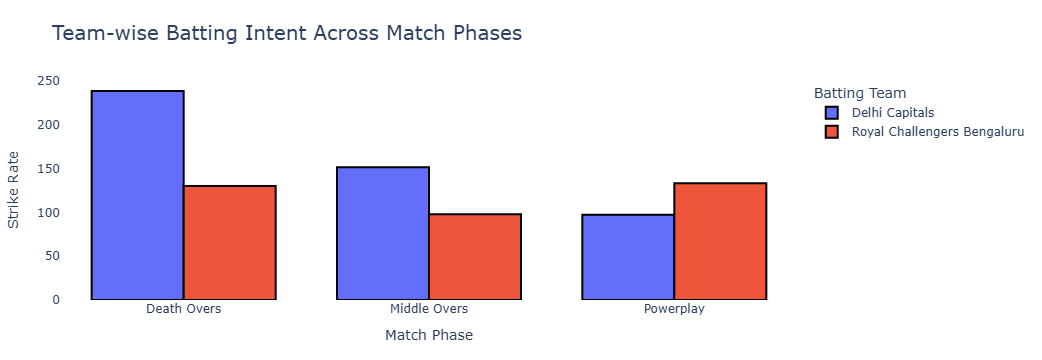

In [60]:
fig = px.bar(
    team_phase_intent,
    x='phase',
    y= 'strike_rate',
    color='batting_team',
    barmode='group',
    title=  'Team-wise Batting Intent Across Match Phases',
    labels={
        'phase': 'Match Phase',
        'strike_rate': 'Strike Rate',
        'batting_team': 'Team'
        
    },
    hover_data={
        'balls_faced': True,
        'total_runs': True,
        'strike_rate':':.2f'
    }
)

fig.update_layout(
    xaxis_title='Match Phase',
    yaxis_title='Strike Rate',
    title_font_size=20,
    legend_title_text='Batting Team',
    bargap=0.25,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='white',
    margin=dict(l=40, r=40, t=80, b=60)   
)
fig.update_traces(marker_line_width=2, marker_line_color='black')

fig.show()


#### Boundary % vs Dot Ball % per Batter

In [61]:
import plotly.graph_objects as go

In [19]:
ipl_match_copy['ball_outcome'] = ipl_match_copy['runs_batter'].apply(
    lambda x: 'Dot' if x == 0 else ('Boundary' if x >= 4 else 'Run')
)

In [20]:
ipl_match_copy.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders,phase,batting_team,ball_outcome
0,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
1,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
2,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,5,5,wides,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
3,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,1,0,1,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Run
4,Royal Challengers Bengaluru,0,V Kohli,MA Starc,PD Salt,1,0,1,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Run


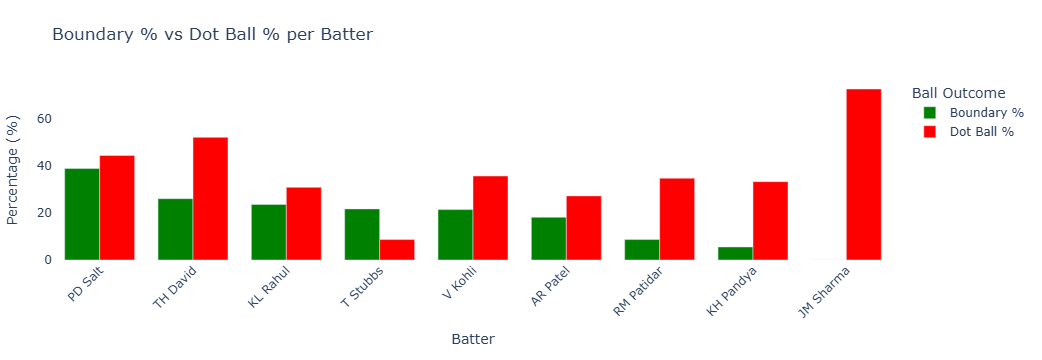

In [21]:
batter_outcome_stats = (
    ipl_match_copy.groupby('batter')
    .ball_outcome.value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).reset_index()

balls_faced = ipl_match_copy.groupby('batter').size().reset_index(name='balls_faced')
batter_outcome_stats = batter_outcome_stats.merge(balls_faced, on='batter')
batter_outcome_stats = batter_outcome_stats[batter_outcome_stats['balls_faced'] >= 10]

batter_outcome_stats = batter_outcome_stats.sort_values(by='Boundary', ascending=False)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=batter_outcome_stats['batter'],
    y=batter_outcome_stats['Boundary'],
    name='Boundary %',
    marker_color='green',
    hovertemplate='%{x}<br>Boundary %: %{y:.2f}<extra></extra>'
))

fig.add_trace(go.Bar(
    x=batter_outcome_stats['batter'],
    y=batter_outcome_stats['Dot'],
    name='Dot Ball %',
    marker_color='red',
    hovertemplate='%{x}<br>Dot Ball %: %{y:.2f}<extra></extra>'
))

fig.update_layout(
    title=' Boundary % vs Dot Ball % per Batter',
    xaxis_title='Batter',
    yaxis_title='Percentage (%)',
    barmode='group',
    bargap=0.25,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='white',
    legend_title_text='Ball Outcome',
    xaxis_tickangle=-45,
    margin=dict(l=40, r=40, t=80, b=100)
)

fig.show()

#### Over-Wise Run Progression of Top 4 Batters

In [22]:
top_batters = (
    ipl_match_copy.groupby('batter')['runs_batter']
    .sum()
    .sort_values(ascending=False)
    .head()
    .index.tolist()
)

In [23]:
top_batters

['KL Rahul', 'T Stubbs', 'PD Salt', 'TH David', 'RM Patidar']

In [24]:
batters_progression = ipl_match_copy[ipl_match_copy['batter'].isin(top_batters)]
batters_overwise = (
    batters_progression.groupby(['batter', 'over'])
    .agg(runs_in_over=('runs_batter', 'sum'))
    .reset_index()
)

In [25]:
batters_progression

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders,phase,batting_team,ball_outcome
0,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
1,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
2,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,5,5,wides,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
3,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,1,0,1,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Run
5,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Delhi Capitals,17,T Stubbs,Yash Dayal,KL Rahul,1,0,1,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals,Run
232,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,6,0,6,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals,Boundary
233,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,4,0,4,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals,Boundary
234,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,0,5,5,wides,NaN,NaN,NaN,Death Overs,Delhi Capitals,Dot


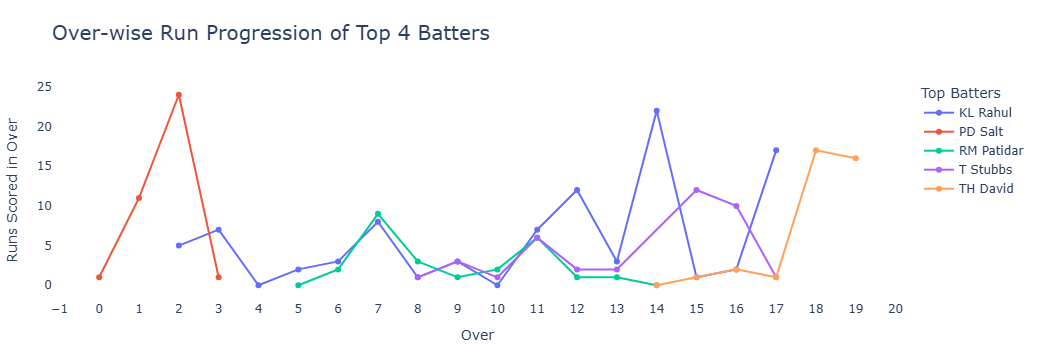

In [26]:
fig = px.line(
    batters_overwise,
    x='over',
    y='runs_in_over',
    color='batter',
    markers=True,
    title=' Over-wise Run Progression of Top 4 Batters',
    labels={
        'over': 'Over',
        'runs_in_over': 'Runs in Over',
        'batter': 'Batter'
    },
    hover_data={
        'over': True,
        'runs_in_over': True,
        'batter': True
    }
)

fig.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis_title='Runs Scored in Over',
    legend_title='Top Batters',
    title_font_size=20,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='white',
    margin=dict(l=40, r=40, t=80, b=60),
    hovermode='x unified'
)

fig.show()

### Correlating Batting Tempo with Wicket Falls

In [27]:
wickets_df = ipl_match_copy[ipl_match_copy['player_out'].notna()]
wickets_by_over = wickets_df.groupby('over').size().reset_index(name='wickets')
runs_by_over = ipl_match_copy.groupby('over')['runs_batter'].sum().reset_index(name='total_runs')

In [28]:
wickets_by_over

,over,wickets
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,8,1
7,9,1
8,12,1
9,14,1


In [29]:
wickets_df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders,phase,batting_team,ball_outcome
24,Royal Challengers Bengaluru,3,PD Salt,AR Patel,V Kohli,0,0,0,NaN,run out,PD Salt,"KL Rahul,V Nigam",Powerplay,Royal Challengers Bengaluru,Dot
36,Royal Challengers Bengaluru,5,D Padikkal,Mukesh Kumar,V Kohli,0,0,0,NaN,caught,D Padikkal,AR Patel,Powerplay,Royal Challengers Bengaluru,Dot
44,Royal Challengers Bengaluru,6,V Kohli,V Nigam,RM Patidar,0,0,0,NaN,caught,V Kohli,MA Starc,Middle Overs,Royal Challengers Bengaluru,Dot
59,Royal Challengers Bengaluru,9,LS Livingstone,MM Sharma,RM Patidar,0,0,0,NaN,caught,LS Livingstone,Ashutosh Sharma,Middle Overs,Royal Challengers Bengaluru,Dot
76,Royal Challengers Bengaluru,12,JM Sharma,Kuldeep Yadav,RM Patidar,0,0,0,NaN,caught,JM Sharma,KL Rahul,Middle Overs,Royal Challengers Bengaluru,Dot
91,Royal Challengers Bengaluru,14,RM Patidar,Kuldeep Yadav,KH Pandya,0,0,0,NaN,caught,RM Patidar,KL Rahul,Middle Overs,Royal Challengers Bengaluru,Dot
105,Royal Challengers Bengaluru,17,KH Pandya,V Nigam,TH David,0,0,0,NaN,caught,KH Pandya,Ashutosh Sharma,Death Overs,Royal Challengers Bengaluru,Dot
137,Delhi Capitals,1,F du Plessis,Yash Dayal,J Fraser-McGurk,0,0,0,NaN,caught,F du Plessis,RM Patidar,Powerplay,Delhi Capitals,Dot
139,Delhi Capitals,2,J Fraser-McGurk,B Kumar,Abishek Porel,0,0,0,NaN,caught,J Fraser-McGurk,JM Sharma,Powerplay,Delhi Capitals,Dot
154,Delhi Capitals,4,Abishek Porel,B Kumar,KL Rahul,0,0,0,NaN,caught,Abishek Porel,JM Sharma,Powerplay,Delhi Capitals,Dot


In [30]:
runs_by_over

,over,total_runs
0,0,3
1,1,24
2,2,35
3,3,16
4,4,3
5,5,8
6,6,13
7,7,20
8,8,13
9,9,8


In [31]:
overwise_analysis = pd.merge(runs_by_over, wickets_by_over, on='over', how='left').fillna(0)

In [32]:
overwise_analysis

,over,total_runs,wickets
0,0,3,0.0
1,1,24,1.0
2,2,35,1.0
3,3,16,1.0
4,4,3,1.0
5,5,8,1.0
6,6,13,1.0
7,7,20,0.0
8,8,13,1.0
9,9,8,1.0


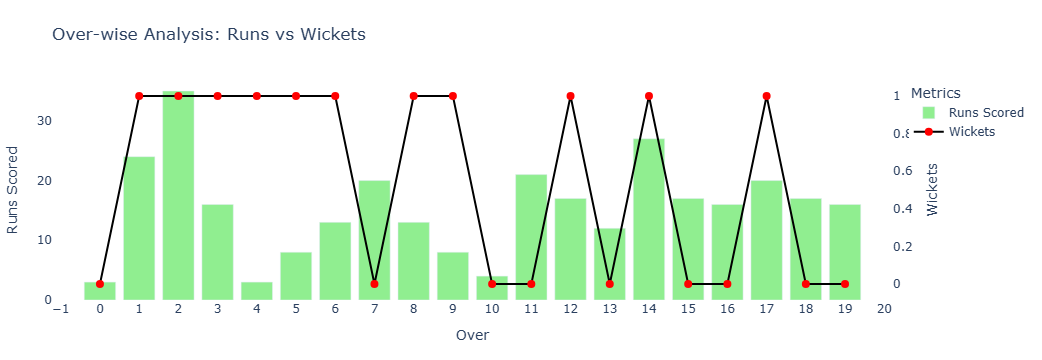

In [47]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=overwise_analysis['over'],
    y=overwise_analysis['total_runs'],
    name='Runs Scored',
    marker_color='lightgreen',
    hovertemplate='Over %{x}<br>Runs: %{y}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=overwise_analysis['over'],
    y=overwise_analysis['wickets'],
    name='Wickets',
    mode='lines+markers',
    marker=dict(color='red', size=8),
    line=dict(width=2, color='black'),
    yaxis='y2',
  
))

fig.update_layout(
    title=' Over-wise Analysis: Runs vs Wickets',
    xaxis=dict(title='Over', tickmode='linear'),
    yaxis=dict(title='Runs Scored'),
    yaxis2=dict(title='Wickets', overlaying='y', side='right'),
    legend_title='Metrics',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='white',
    margin=dict(l=40, r=40, t=80, b=60),

)

fig.show()